In [53]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [99]:
# Reading CSV File

india = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\India's Public-Private Partnership Projects\Book1.csv", encoding='ISO-8859-1')

india.head(5)

,Sr No.,Project Name,Sponsoring Authority,Location,Sector,Sub Sector,Total Project Cost (In Rs. Crore),PPPAC Meeting Date,Meeting Number,Recommended For
0,1,Considering the revalidation of the revised co...,Ministry of Road Transport and Highways (MoRTH),Meghalaya,Transport and Logistics,Roads,22864,21.02.2025,121st PPPAC,Final approval
1,2,"Four-lane, Badvel to Nellore section of NH-67 ...",Ministry of Road Transport and Highways (MoRTH),Andhra Pradesh,Transport and Logistics,Roads,4377,04.02.2025,120th PPPAC,Final approval
2,3,Two-lane with Paved shoulder from Basnaghat (M...,Ministry of Road Transport and Highways (MoRTH),Assam,Transport and Logistics,Roads,0,04.02.2025,120th PPPAC,Final approval
3,4,Six-lane Access Control Greenfield Capital Reg...,Ministry of Road Transport and Highways (MoRTH),Odisha,Transport and Logistics,Roads,0,04.02.2025,120th PPPAC,Final approval
4,5,"Four-lane, Parmakudi to Ramanathapuram Section...",Ministry of Road Transport and Highways (MoRTH),Tamil Nadu,Transport and Logistics,Roads,32,04.02.2025,120th PPPAC,Final approval


In [55]:
# Changing Data Type

india['PPPAC Meeting Date'] = india['PPPAC Meeting Date'].astype("datetime64[ns]")

In [56]:
# Checking missing values

india.isnull().sum()

Sr No.                               0
Project Name                         0
Sponsoring Authority                 0
Location                             0
Sector                               0
Sub Sector                           0
Total Project Cost (In Rs. Crore)    0
PPPAC Meeting Date                   0
Meeting Number                       0
Recommended For                      0
dtype: int64

In [57]:
# Count of Projects per sector

sector_count = india['Sector'].value_counts()
print(sector_count)

Sector
Transport and Logistics                 342
Social and Commercial Infrastructure     22
Communication                             4
Education                                 3
Energy                                    3
Name: count, dtype: int64


In [58]:
# Top 10 States by number of projects

state_count = india['Location'].value_counts().nlargest(10)
print(state_count)

Location
Maharashtra       33
Tamil Nadu        28
Uttar Pradesh     28
Rajasthan         24
Karnataka         24
Andhra Pradesh    23
Odisha            22
Gujarat           21
Madhya Pradesh    21
Multi State       19
Name: count, dtype: int64


In [59]:
# Top 10 sponsoring authorities

sponsers = india['Sponsoring Authority'].value_counts().nlargest(10)
sponsers

Sponsoring Authority
Ministry of Road Transport and Highways            257
Ministry of Shipping                                39
Ministry of Road Transport and Highways (MoRTH)     18
Ministry of Railways                                14
Ministry of Home Affairs                            13
Airports Authority of India                          6
Ministry of Civil Aviation                           4
Department of Telecommunications                     4
Ministry of Youth Affairs and Sports (MoYA&S)        4
Department of Higher Education                       3
Name: count, dtype: int64

In [60]:
# Mean Project cost per sector

avg_cost_per_sector = india.groupby('Sector')['Total Project Cost (In Rs. Crore)'].mean().sort_values(ascending= False)
print(avg_cost_per_sector)

Sector
Communication                           23718.000000
Energy                                   7325.666667
Transport and Logistics                  1811.239766
Social and Commercial Infrastructure      529.500000
Education                                 183.333333
Name: Total Project Cost (In Rs. Crore), dtype: float64


In [ ]:
# Top 5 Sub-Sectors

subsectors = india['Sub Sector'].value_counts().nlargest(5)
print(subsectors)

Sub Sector
Roads                                                                                 276
Ports                                                                                  41
Railway track including electrical & signalling system, tunnels, viaducts, bridges     15
Airport                                                                                10
Affordable Housing                                                                      9
Name: count, dtype: int64


In [ ]:
# Top 5 Sub-Sectors funding

cost_subsector = india.groupby('Sub Sector')['Total Project Cost (In Rs. Crore)'].sum().sort_values(ascending= False).nlargest(5)
print(cost_subsector)

Sub Sector
Roads                                                                                 409234
Railway track including electrical & signalling system, tunnels, viaducts, bridges    135078
Telecommunication & Telecom Services                                                   94872
Ports                                                                                  66115
Oil/Gas/Liquefied Natural Gas (LNG) storage facility                                   21977
Name: Total Project Cost (In Rs. Crore), dtype: int64


In [75]:
# Count of projects over time

approval = india['PPPAC Meeting Date'].dt.year.value_counts().sort_index()
approval.index = approval.index.astype(int)
print(approval)

PPPAC Meeting Date
2006    13
2007    15
2008    43
2009    36
2010    45
2011    48
2012    34
2013    18
2014    23
2015    14
2016    14
2017     8
2018     7
2019     8
2020     8
2021    10
2022     5
2023     3
2024    14
2025     8
Name: count, dtype: int64


1. Projects per Sector – Bar Chart

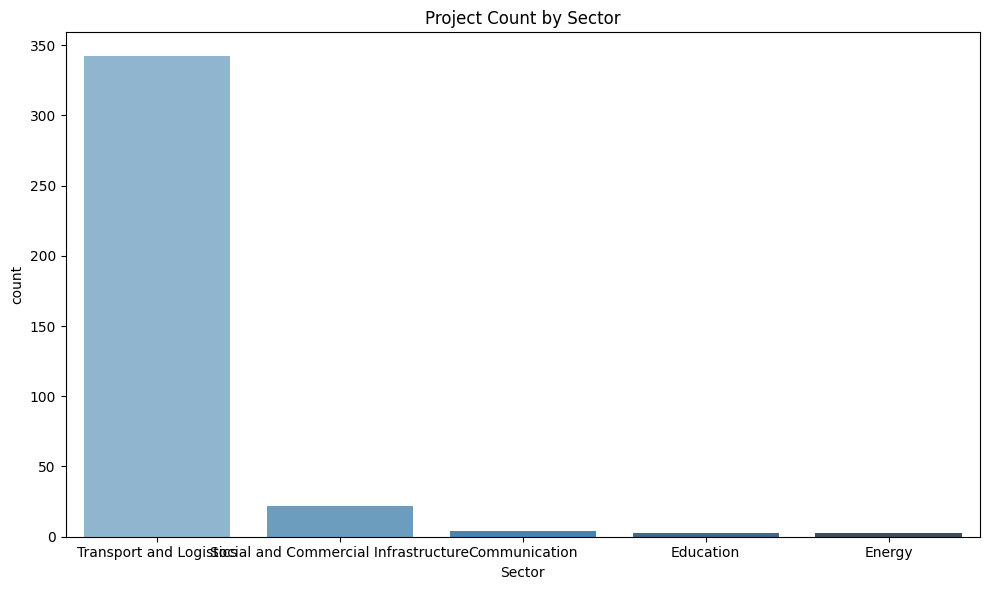

In [66]:
# Bar chart for project count per sector

plt.figure(figsize=(10, 6))
sns.countplot(
    data=india,
    x='Sector',
    order=india['Sector'].value_counts().index,
    palette='Blues_d'
)

plt.title("Project Count by Sector")
plt.tight_layout()
plt.show()

2. Projects per State – Bar Chart

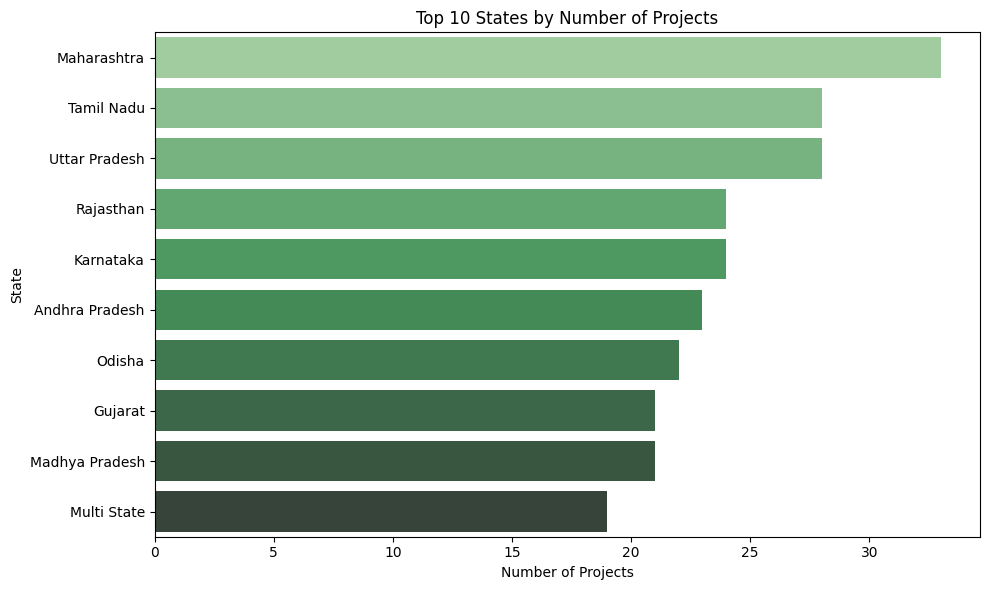

In [73]:
# Top 10 states with highest number of projects

top_states = india['Location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_states.values,
    y=top_states.index,
    palette='Greens_d')
plt.title('Top 10 States by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('State')
plt.tight_layout()
plt.show()


3. Average Project Cost by Sector – Bar Chart

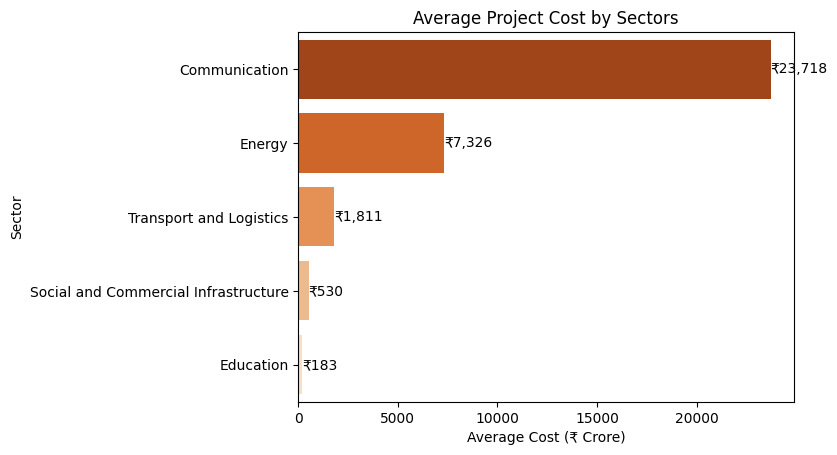

In [71]:
plt.Figure(figsize= (10, 6))

sns.barplot(
    x= avg_cost_per_sector.values,
    y= avg_cost_per_sector.index,
    palette= "Oranges_r"
)
for i, value in enumerate(avg_cost_per_sector.values):
    plt.text(value, i, f"₹{value:,.0f}", va='center')
    
plt.title("Average Project Cost by Sectors")
plt.xlabel("Average Cost (₹ Crore)")
plt.ylabel("Sector")
plt.show()


4. Approval Trends Over Time – Line Chart

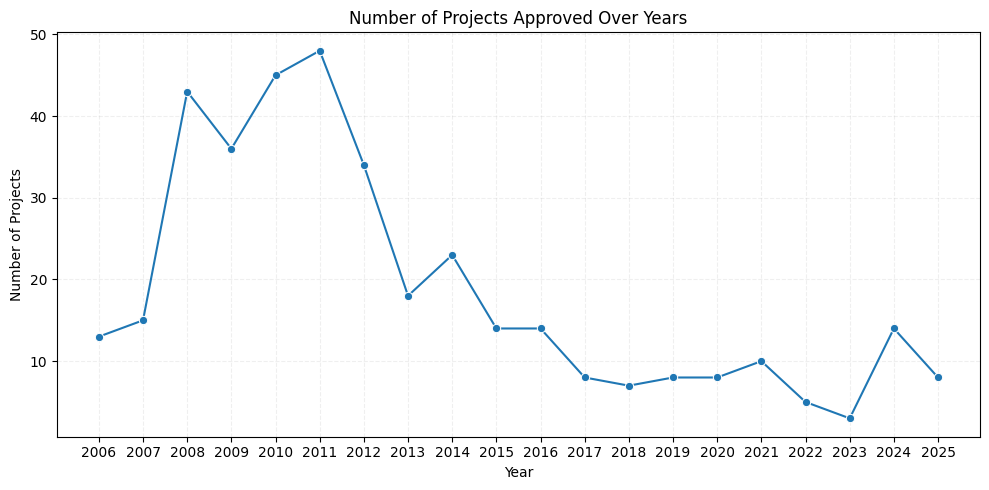

In [82]:
# Number of projects approved each year

plt.figure(figsize=(10,5))
sns.lineplot(x=approval.index, y=approval.values, marker='o')
plt.xticks(ticks=approval.index.astype(int))
plt.title('Number of Projects Approved Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.grid(True, linestyle= '--', alpha= 0.2)
plt.tight_layout()
plt.show()

5. Top Sub-Sectors by Project Count

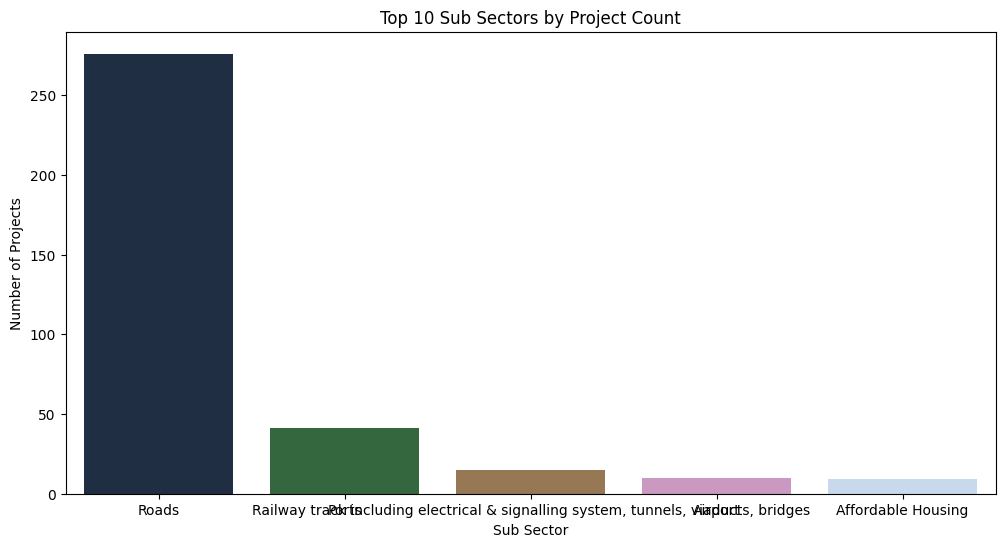

In [ ]:
# Count of Sub Sectors by Project

plt.figure(figsize=(12,6))
ax = sns.barplot(x=subsectors.index,
                 y=subsectors.values,
                 palette='cubehelix')
plt.xlabel('Sub Sector')
plt.ylabel('Number of Projects')
plt.title('Top 10 Sub Sectors by Project Count')
plt.show()


6. Sub Sector vs. Total Project Cost

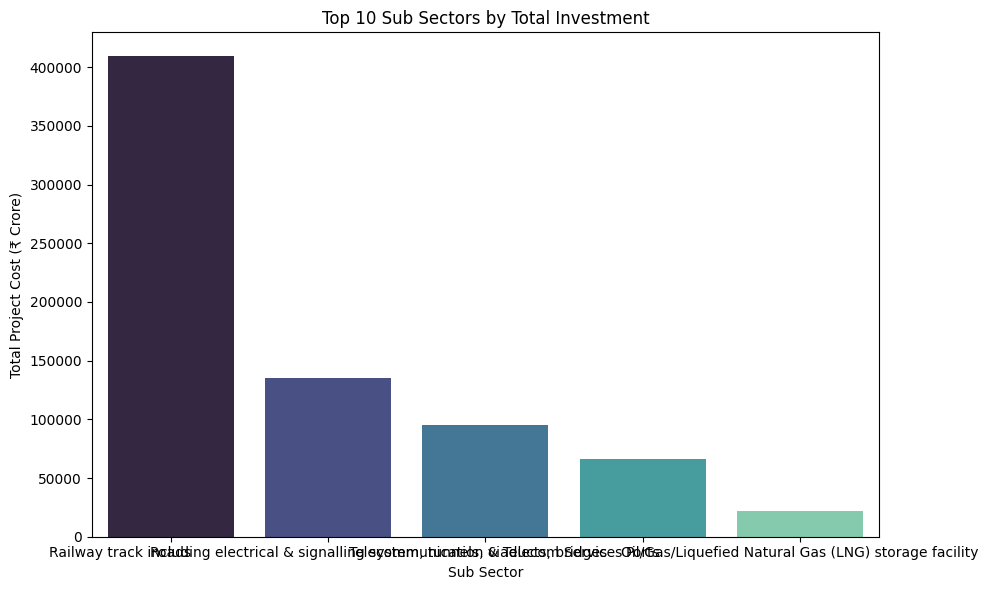

In [98]:
# Sub Sectors by Total Investment

plt.figure(figsize=(10,6))
sns.barplot(x=cost_subsector.index,
            y=cost_subsector.values,
            palette='mako')
plt.xlabel('Sub Sector')
plt.ylabel('Total Project Cost (₹ Crore)')
plt.title('Top 10 Sub Sectors by Total Investment')
plt.tight_layout()
plt.show()


6. Recommendation Types – Donut Chart

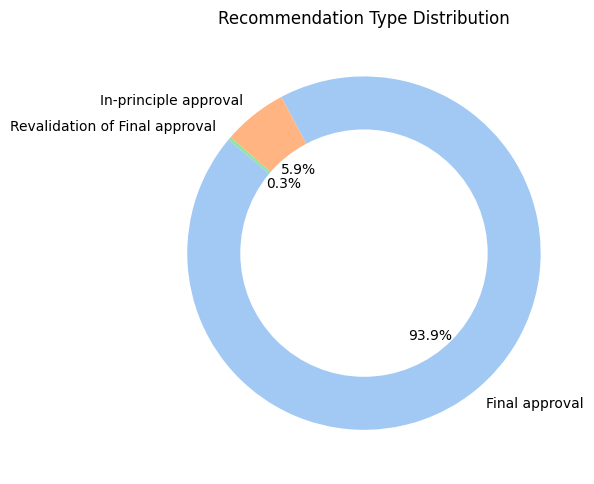

In [84]:
# Recommendation type distribution
recommendation = india['Recommended For'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(recommendation, labels=recommendation.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# Add a white circle to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Recommendation Type Distribution')
plt.tight_layout()
plt.show()
